In [1]:
# Install instructions for rubin_sim at https://github.com/lsst/rubin_sim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import os

In [3]:
baseline_file = get_baseline()
conn = maf.db.OpsimDatabase(baseline_file)
run_name = os.path.split(baseline_file)[-1].replace('.db', '')


In [4]:
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)


In [5]:
bundle_list = []

# Let's look at year 1
sql = 'night < 365'
slicer = maf.HealpixSlicer(useCache=False)
# Compute proper motion uncertainty for a r=20 M-type star
metric = maf.ProperMotionMetric(rmag=20, SedTemplate='M')
plotDict = {'colorMax': 30}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict))

# I think this defaults to an L7 brown dwarf. Calculates distance to where
# one reaches adequate SNR to measure parallax.
metric = maf.BDParallaxMetric()
plotDict={}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict))

bd = maf.makeBundlesDictFromList(bundle_list)


bg = maf.MetricBundleGroup(bd, conn, outDir, resultsDb)



Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint night < 365 for columns ['fieldDec', 'seeingFwhmGeom', 'fiveSigmaDepth', 'rotSkyPos', 'observationStartMJD', 'fieldRA', 'filter']
Found 211662 visits
Running:  ['opsim_properMotion_night_lt_365_HEAL', 'opsim_bdParallax_night_lt_365_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/astrometryUtils.py:72: RuntimeWarning: divide by zero encountered in true_divide
  result = fwhm/(snr)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metrics/brownDwarfMetric.py:103: RuntimeWarning: divide by zero encountered in true_divide
  sigma_ra = np.sqrt(1./np.sum(1./sigma_A**2, axis=1))
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metrics/brownDwarfMetric.py:104: RuntimeWarning: divide by zero encountered in true_divide
  sigma_dec = np.sqrt(1./np.sum(1./sigma_B**2, axis=1))
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metrics/brownDwarfMetric.py:106: RuntimeWarning: divide by zero encountered in true_divide
  sigma = np.sqrt(1./(1./sigma_ra**2+1./sigma_dec**2))*1e3


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 365" constraint now.


0.0 180.0 -180.0 180.0
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 7802098 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 262 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


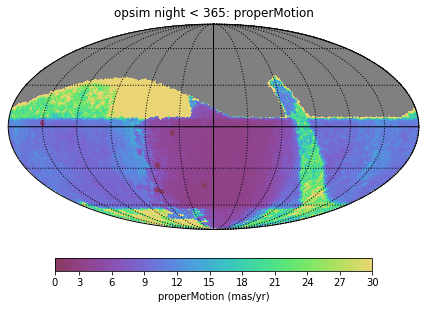

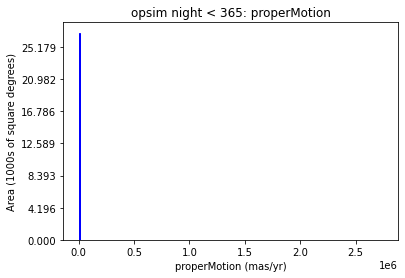

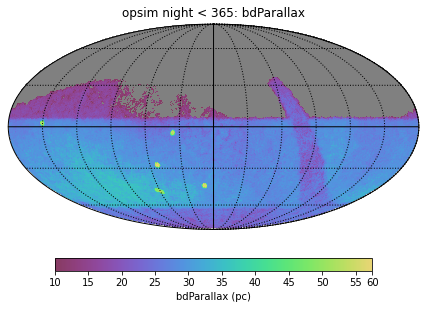

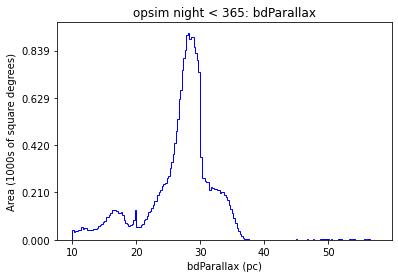

In [6]:
bg.runAll()
bg.plotAll(closefigs=False)